In [8]:
import matplotlib.pyplot as plt
from subprocess import check_output
import os
input_folder = "../dataset"

###run once
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import graphviz
import pydotplus
from pandas import DataFrame,Series
from sklearn import tree
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
movie_file = pd.read_csv(input_folder+"/movie_metadata_cleaned_filled_values.csv")
movie_data= DataFrame(movie_file)
movie_data.fillna(movie_data.mean())
movie_data = movie_data.dropna()

#movie_data.head(10)
#len(movie_data)


In [10]:
drop_predictors = ['gross', 'worldwide_gross','color', 'movie_title', 'director_name',
       'actor_1_name', 'actor_2_name','actor_3_name', 
       'content_rating', 'genres', 'plot_keywords', 'movie_imdb_link', 'country', 'language', 'release_date','title_year','aspect_ratio']

#define predictors and predicted values
X = movie_data.drop(drop_predictors, axis=1)
y = movie_data.worldwide_gross

from sklearn import preprocessing

####standardize data to address different scales.
standardized_X = preprocessing.scale(X)
standardized_y = preprocessing.scale(y)
#print(standardized_y)

#### split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(standardized_X, standardized_y, train_size=0.7, random_state=0)

rn_model = RadiusNeighborsRegressor()

##Train the model using the training sets 
rn_model.fit(X_train, y_train)

RadiusNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, p=2, radius=1.0, weights='uniform')

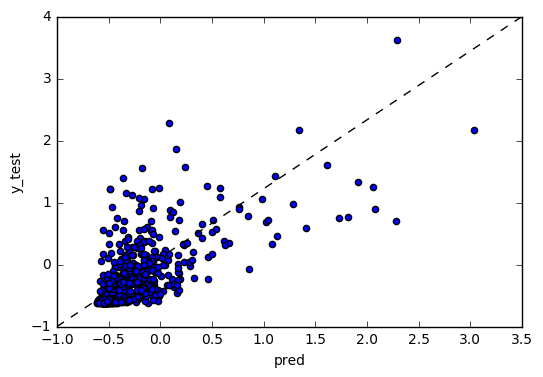

In [11]:
pred = rn_model.predict(X_test)
plt.scatter(pred, y_test, label='worldwide_gross')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')
plt.show()

In [13]:
mean_squared_error(y_test, pred)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [14]:
r2_score(y_test, pred, multioutput='variance_weighted')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').